<a href="https://colab.research.google.com/github/tsila-andriantsoa/Learning_image_classification/blob/main/Fashion_MNIST_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


### Importer les données

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explorer les données

In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Prétraiter les données

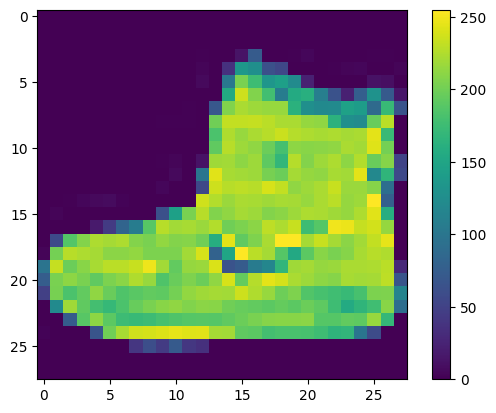

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

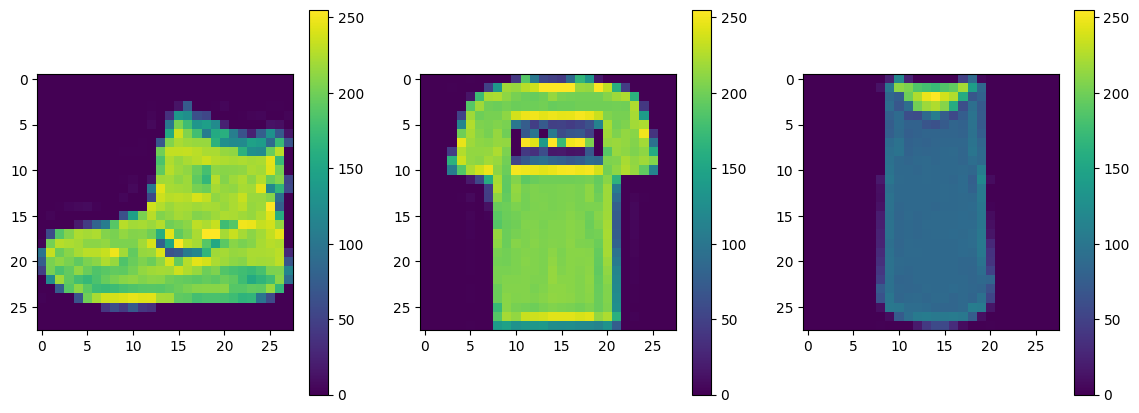

In [23]:
plt.figure(figsize=(14,5))
for i, image in enumerate(train_images[:3]):
  plt.subplot(1,3,i+1)
  plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
plt.show()

Les valeurs de pixel se situent dans la plage de 0 à 255.

#### Scaling image

Transformer les valeurs à l'échelle dans une plage de 0 à 1 avant de les alimenter au modèle de réseau neuronal.

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

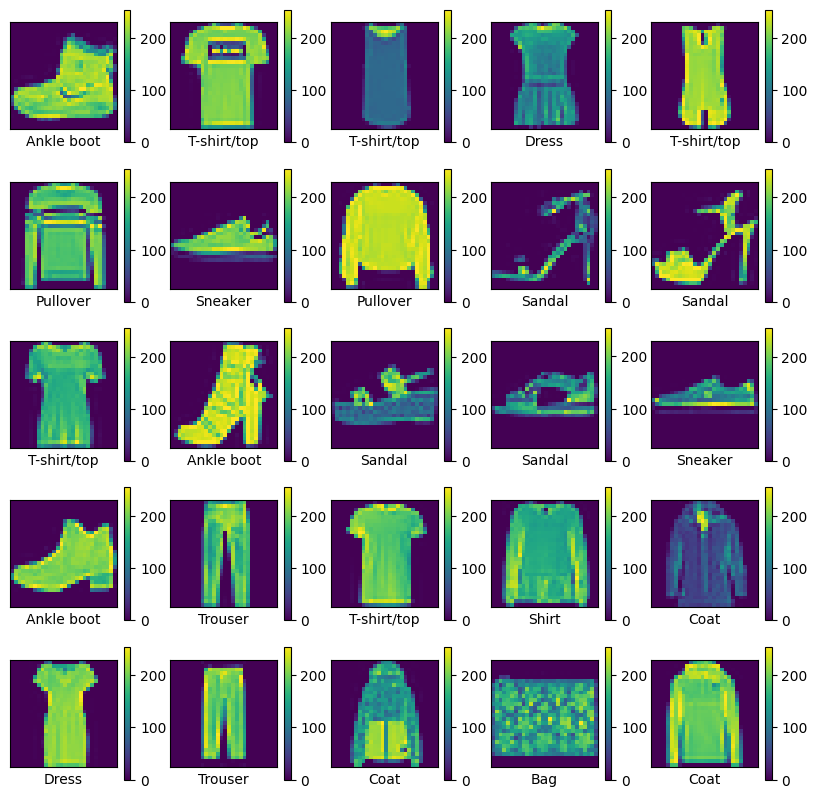

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], )
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construire le modèle

##### Mettre en place les calques

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##### Compiler le modèle

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##### Nourrir le modèle

In [32]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6664 - loss: 8.9355
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7087 - loss: 0.7571
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7418 - loss: 0.6588
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7954 - loss: 0.5678
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8070 - loss: 0.5535
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8169 - loss: 0.5240
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8245 - loss: 0.4999
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8279 - loss: 0.4982
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8285 - loss: 0.4884
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8303 - loss: 0.4893


### Évaluer la précision

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8158 - loss: 0.5577

Test accuracy: 0.8158000111579895


### Faire des prédictions

In [34]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [35]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Une prédiction est un tableau de 10 nombres. Ils représentent la "confiance" du modèle que l'image correspond à chacun des 10 vêtements différents. Vous pouvez voir quelle étiquette a la valeur de confiance la plus élevée

In [38]:
print(predictions)
print(f'Class predite :  {np.argmax(predictions[0])}')

[[2.9351677e-14 1.8101741e-11 2.0563593e-33 ... 2.1679443e-01
  2.0335018e-12 7.6109296e-01]
 [4.7210592e-04 2.9028740e-04 4.0006536e-01 ... 0.0000000e+00
  2.6303428e-04 4.2662375e-22]
 [6.8129985e-12 9.9999994e-01 3.9181023e-09 ... 0.0000000e+00
  6.6702303e-17 0.0000000e+00]
 ...
 [7.0717739e-04 1.7410461e-05 8.9745343e-05 ... 2.1362861e-04
  9.9806255e-01 3.4166726e-05]
 [2.8632579e-09 9.9999708e-01 8.6297766e-12 ... 0.0000000e+00
  3.2423647e-11 0.0000000e+00]
 [5.5493815e-06 6.1954526e-16 7.5144611e-13 ... 3.7094980e-02
  1.3965396e-03 9.0838047e-03]]
Class predite :  9
